In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [3]:
df = pd.read_csv("Data/bike_buyers.csv")

In [4]:
df.head()


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [5]:
df.shape

(1000, 13)

In [6]:
df.columns
print()

In [7]:
categoric_columns = df.select_dtypes(include='object').columns
print("String_Columns = ",categoric_columns)
print()
numeric_columns = df.select_dtypes(include=['int64','float64']).columns
print("Numerical_Columns =",numeric_columns)

String_Columns =  Index(['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner',
       'Commute Distance', 'Region', 'Purchased Bike'],
      dtype='object')

Numerical_Columns = Index(['ID', 'Income', 'Children', 'Cars', 'Age'], dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [9]:
df.dtypes

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

In [10]:
df.duplicated("ID").sum()

0

In [11]:
df.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

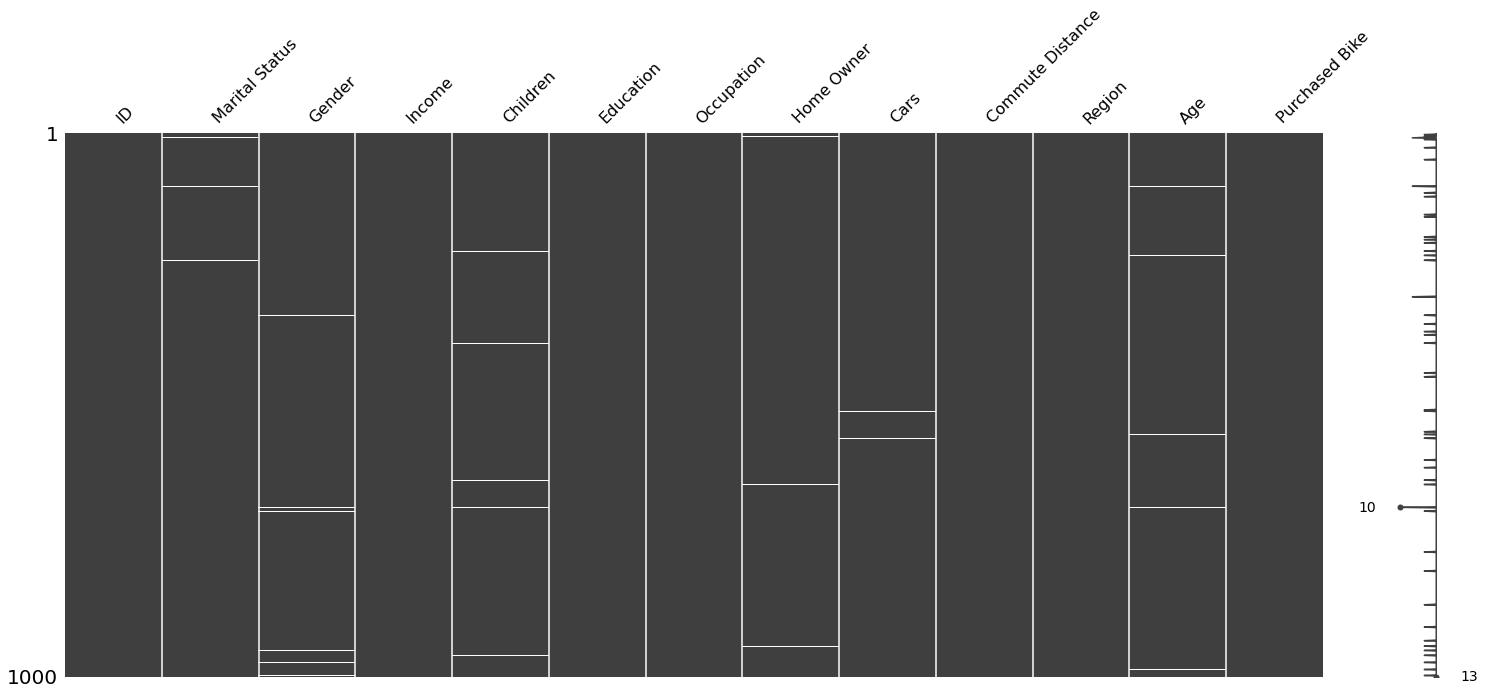

In [12]:
missingno.matrix(df)
plt.show()

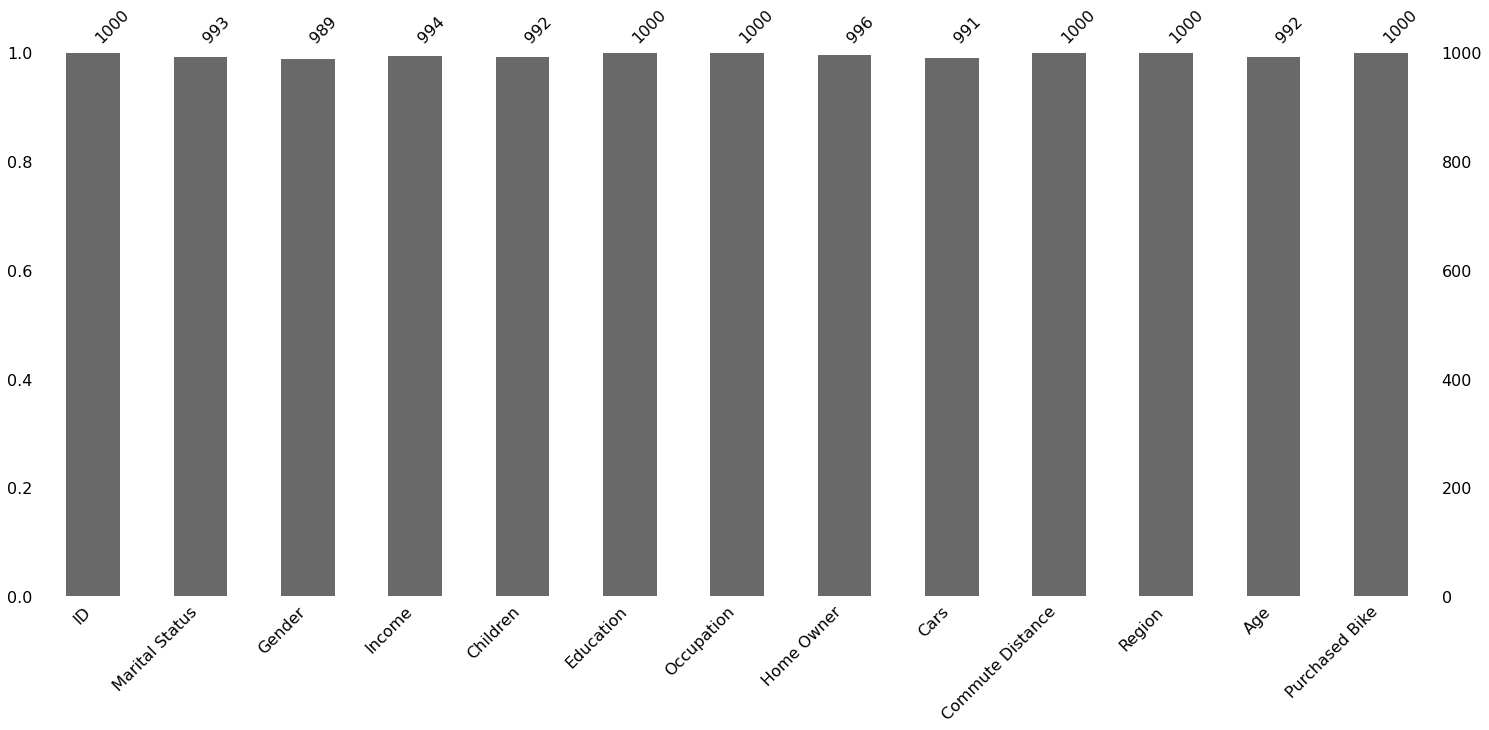

In [13]:
missingno.bar(df)
plt.show()

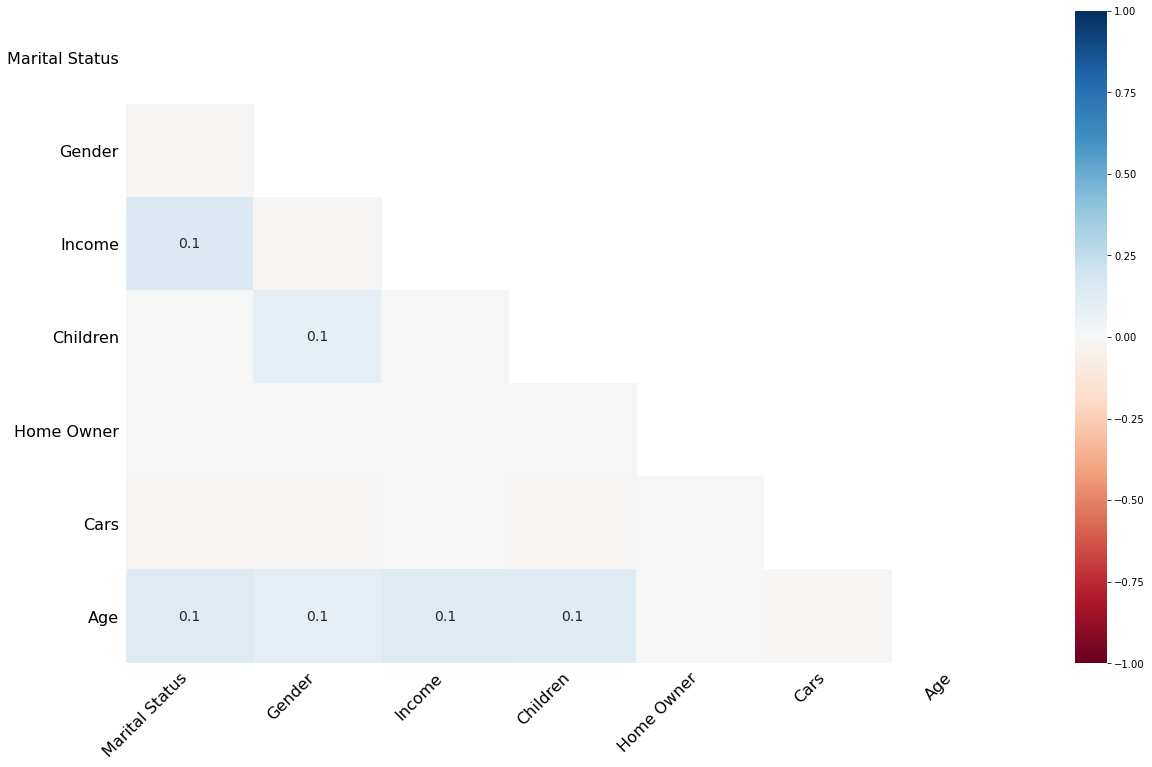

In [14]:
missingno.heatmap(df)
plt.show()

In [15]:
df['Income'].fillna(df['Income'].mean(),inplace=True)
df['Children'].fillna(df['Children'].mean(),inplace=True)
df['Cars'].fillna(df['Cars'].mean(),inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Marital Status'].fillna('NaN',inplace=True)
df['Gender'].fillna('NaN',inplace=True)
df['Home Owner'].fillna('NaN',inplace=True)

In [16]:
df.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [17]:
df['Commute Distance'] = df['Commute Distance'].apply(lambda x: x.replace(" Miles", " "))

In [18]:
num_cols = df.dtypes[df.dtypes != "O"].index.tolist()

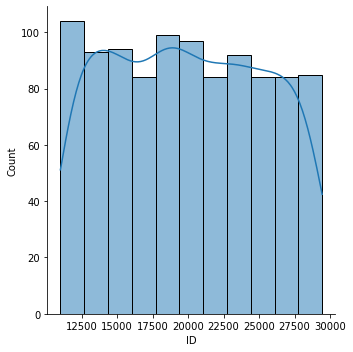

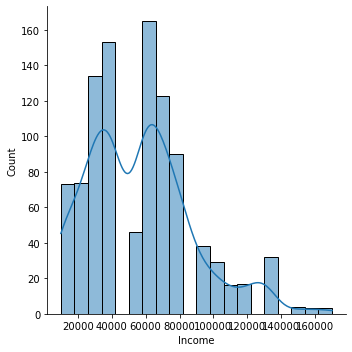

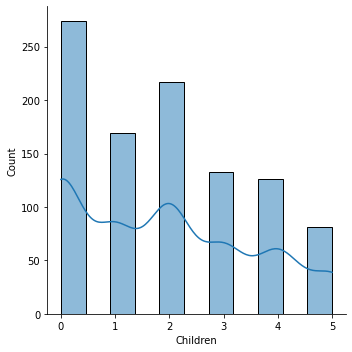

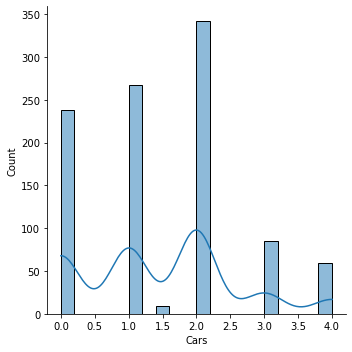

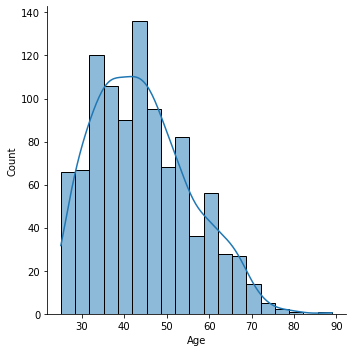

In [19]:
for c in num_cols:
    sns.displot(df[c], kde = True)
plt.show()

 Check for outliers 

<AxesSubplot:>

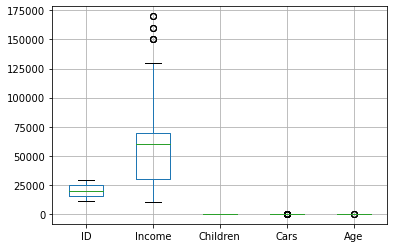

In [21]:
df.boxplot(numeric_columns.to_list())

So only the income column has outliers.

In [22]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,30974.380206,1.620383,1.116691,11.316422
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [24]:
cor = df.corr()
cor

,ID,Income,Children,Cars,Age
ID,1.000000,-0.074879,-0.028591,0.021949,-0.054112
Income,-0.074879,1.000000,0.258783,0.434591,0.170355
Children,-0.028591,0.258783,1.000000,0.276667,0.525962
Cars,0.021949,0.434591,0.276667,1.000000,0.184267
Age,-0.054112,0.170355,0.525962,0.184267,1.000000


##  Explain the distribution of some important features using visualizations


Let's analysis income column with other column

<AxesSubplot:xlabel='Age', ylabel='Income'>

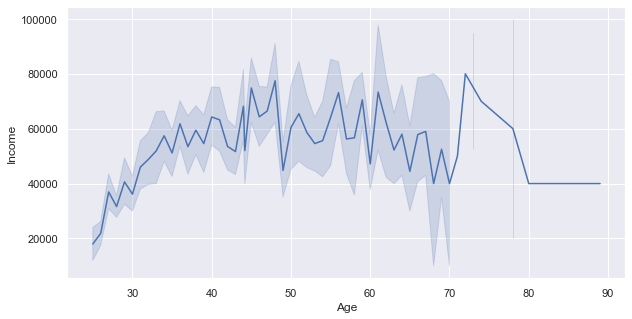

In [28]:
sns.lineplot(data = df,  x ='Age', y ='Income')

<AxesSubplot:xlabel='Age', ylabel='Income'>

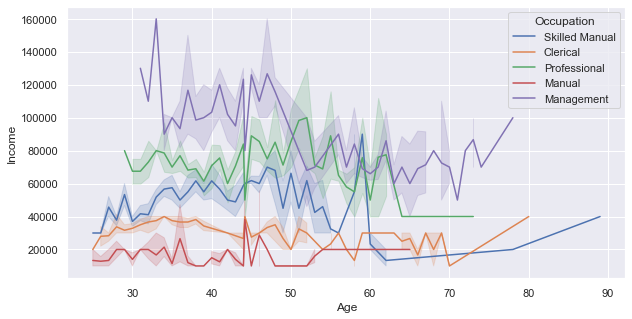

In [26]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(data = df,  x ='Age',  y ='Income', hue ='Occupation')

The distribution between INCOME and Region

<AxesSubplot:xlabel='Income', ylabel='Density'>

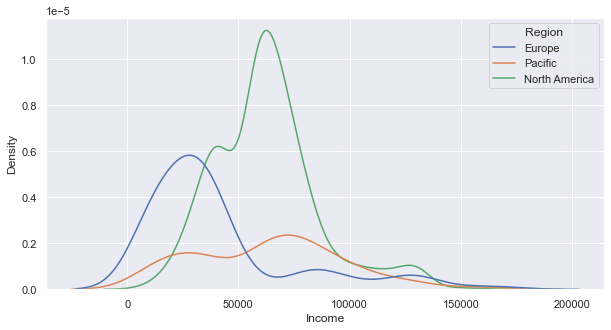

In [29]:
sns.kdeplot(data = df, x = 'Income', hue = 'Region')

The distribution between INCOME and OCCUPATION

<AxesSubplot:xlabel='Income', ylabel='Density'>

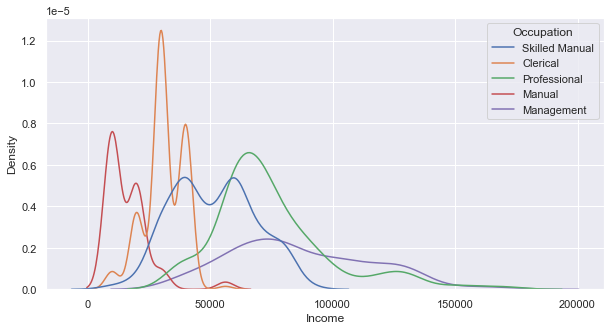

In [30]:
sns.kdeplot(data = df, x = 'Income', hue = 'Occupation')

<AxesSubplot:ylabel='Frequency'>

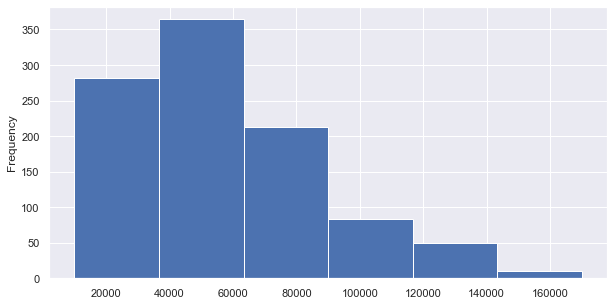

In [34]:
import matplotlib.pyplot as plt
df['Income'].plot(kind='hist',bins=6)

<AxesSubplot:xlabel='Income', ylabel='Count'>

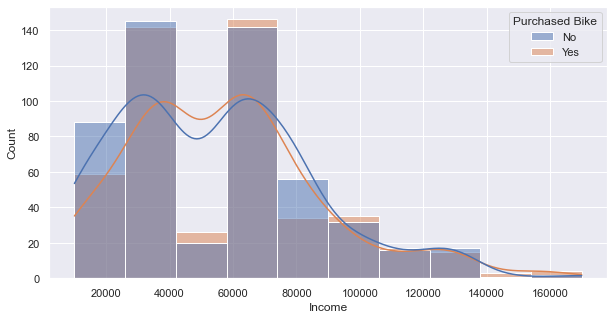

In [32]:
sns.histplot(data=df, x='Income', hue='Purchased Bike',bins=10, kde=True, color="m")

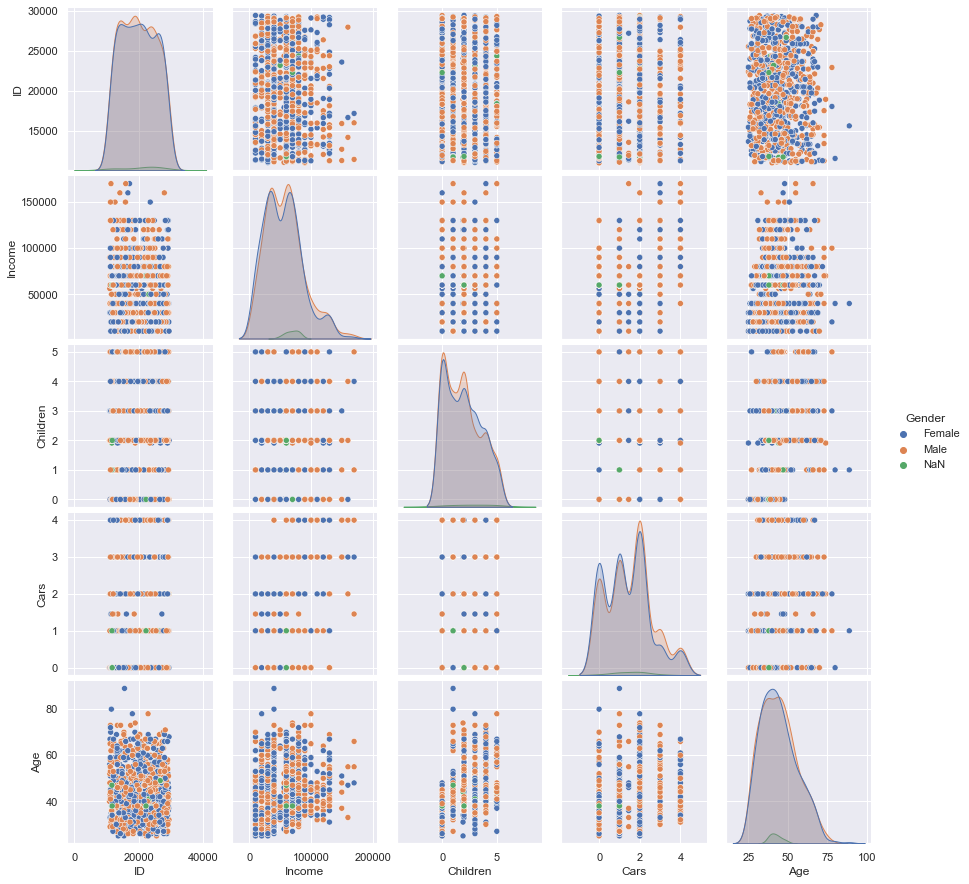

In [36]:
sns.pairplot(data=df, hue='Gender')